# Create the Neural Network class

# Create a forward pass function

# Use the cross entropy loss with logits

# Create a predict function

# Create the main training mechanism and implement gradient descent with automatic differentiation

# Break down data-set in batches

# Apply the neural network model to solve a multi-class classification problem

# Plot the training results

In [86]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.0.0


In [87]:

def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
    x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return (x_train, y_train), (x_test, y_test)

def plot_random_examples(x, y, p=None):
    indices = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    if p is None:
        p = y
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color=col)
    return plt

def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt


In [88]:
#   INITIALIZE NEURAL NETWORK

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        # Your code here
        for i in range(1,self.L):
            self.W[i]=tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i]=tf.Variable(tf.random.normal(shape=(self.layers[i],1)))

In [97]:
#  FORWARD PASS

class NeuralNetwork(NeuralNetwork):
    def forward_pass(self, X):
        # Your code here
        A=tf.convert_to_tensor(X,dtype=tf.float32)
        for i in range(1,self.L):
            z=tf.matmul(A,tf.transpose(self.W[i]))+tf.transpose(self.b[i])
            if i!=self.L-1:
                A=tf.nn.relu(z)
            else:
                A=z
        return A

In [98]:
#  COMPUTING LOSS AND UPDATE PARAMETERS
class NeuralNetwork(NeuralNetwork):
    # Your code here
    def compute_loss(self,A,Y):
        loss=tf.nn.softmax_cross_entropy_with_logits(Y,A)
        return tf.reduce_mean(loss)
    def update_params(self,lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr*self.dW[i])
            
            self.b[i].assign_sub(lr*self.db[i])

In [99]:
#  PREDICT AND INFO FUNCTIONS

class NeuralNetwork(NeuralNetwork):
    def predict(self, X):
        # Your code here
        A=self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A),axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

In [105]:
# TRAINING ON BATCH
class NeuralNetwork(NeuralNetwork):
    def train_on_batch(self, X, Y, lr):
        # Your code here
        X=tf.convert_to_tensor(X,dtype=tf.float32)
        Y=tf.convert_to_tensor(Y,dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A=self.forward_pass(X)
            loss=self.compute_loss(A,Y)
            
        for i in range(1,self.L):
            self.dW[i]=tape.gradient(loss,self.W[i])
            self.db[i]=tape.gradient(loss,self.b[i])
        del tape
        self.update_params(lr)
        return loss.numpy()

In [110]:
# TRAINING ON COMPLETE SET

class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):
        # Your code here
        history={'val_loss':[],'train_loss':[],'val_acc':[]}
        for e in range(0,epochs):
            epoch_train_loss=0
            print('epoch []'.format(e),end='.')
            for i in range(0,steps_per_epoch):
                x_batch=x_train[i*batch_size:(i+1)*batch_size]
                y_batch=y_train[i*batch_size:(i+1)*batch_size]
                batch_loss=self.train_on_batch(x_batch,y_batch,lr)
                epoch_train_loss+=batch_loss
                if i%int(steps_per_epoch/10)==0:
                    print(end='.')
                history['train_loss'].append(epoch_train_loss/steps_per_epoch)
                val_A=self.forward_pass(x_test)
                val_loss=self.compute_loss(val_A,y_test).numpy()
                history['val_loss'].append(val_loss)
                val_preds=self.predict(x_test)
                val_acc=np.mean(np.argmax(y_test,axis=1)==val_preds.numpy())
                history['val_acc'].append(val_acc)
                print('val acc',val_acc)
            return history

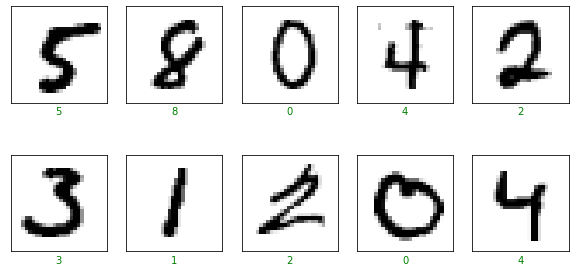

In [111]:
# APPLICATION
(x_train,y_train),(x_test,y_test)=load_data()
plot_random_examples(x_train,y_train).show()

In [112]:
net=NeuralNetwork([784,128,128,10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [113]:
batch_size=120
epochs=5
steps_per_epoch=int(x_train.shape[0]/batch_size)
lr=3e-3
print('steps per epoch ',steps_per_epoch)

steps per epoch  500


In [114]:
history=net.train(x_train,y_train,x_test,y_test,epochs,steps_per_epoch,batch_size,lr)

epoch []..val acc 0.0929
val acc 0.0946
val acc 0.1038
val acc 0.1268
val acc 0.1324
val acc 0.14
val acc 0.1427
val acc 0.1617
val acc 0.1916
val acc 0.2162
val acc 0.2218
val acc 0.2361
val acc 0.2449
val acc 0.2573
val acc 0.28
val acc 0.2966
val acc 0.3039
val acc 0.3416
val acc 0.3504
val acc 0.3383
val acc 0.336
val acc 0.3391
val acc 0.3511
val acc 0.3835
val acc 0.3801
val acc 0.3809
val acc 0.3941
val acc 0.4047
val acc 0.4133
val acc 0.4269
val acc 0.4371
val acc 0.4481
val acc 0.4482
val acc 0.4485
val acc 0.447
val acc 0.4683
val acc 0.473
val acc 0.4781
val acc 0.4808
val acc 0.4944
val acc 0.5061
val acc 0.5093
val acc 0.5126
val acc 0.5209
val acc 0.5199
val acc 0.529
val acc 0.5284
val acc 0.5211
val acc 0.5221
val acc 0.5333
.val acc 0.5323
val acc 0.5437
val acc 0.5405
val acc 0.5507
val acc 0.5526
val acc 0.5528
val acc 0.5506
val acc 0.5613
val acc 0.5649
val acc 0.5729
val acc 0.5671
val acc 0.5756
val acc 0.5661
val acc 0.5836
val acc 0.5796
val acc 0.5879
val acc

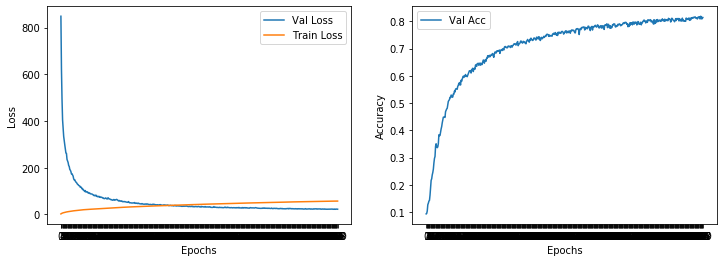

In [116]:
plot_results(history).show()

In [117]:
preds=net.predict(x_test)

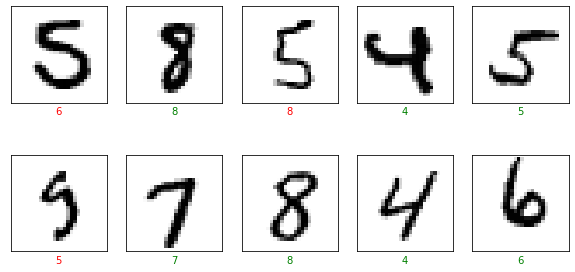

In [118]:
plot_random_examples(x_test,y_test,preds.numpy()).show()